## Deep Learning Challenge

### Loading the CIFAR10 data
The data can be loaded directly from keras (`keras.datasets.cifar10`).

```python
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
```

In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [2]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


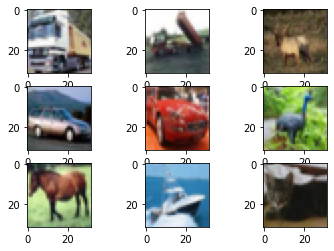

In [4]:
import matplotlib.pyplot as plt
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(train_images[i],cmap = plt.get_cmap('gray'))

#### Task: Build a convulution neural network (CNN) to predict the object in the images. 

Try to do it on your own first before consulting with peers or tutorials on the internet. If you are stuck early, reach out to a mentor who will point you in the right direction.

In [5]:
#function to normalise the data

def normalise(x):
    pixel_to_float = x.astype('float32')
    return pixel_to_float/255


In [6]:
#normalise all the data
train_images = normalise(train_images)
test_images = normalise(test_images)

In [7]:
# Initialising the CNN
classifier = Sequential()

In [8]:
# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, input_shape = (32, 32, 3), activation = 'relu'))
classifier.add(Convolution2D(32, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [9]:
classifier.add(Convolution2D(64, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
classifier.add(Convolution2D(128, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [11]:
# Step 3 - Flattening
classifier.add(Flatten())

In [12]:
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))

classifier.add(Dense(10, activation='softmax'))


In [13]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         7

In [14]:
#data preprocessing
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
#compile the model
classifier.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
#train the model
classifier.fit(train_images, train_labels, epochs=20, batch_size = 64)

Epoch 1/20
782/782 [==============================] - 60s 76ms/step - loss: 1.5396 - accuracy: 0.4343
Epoch 2/20
782/782 [==============================] - 58s 74ms/step - loss: 1.1256 - accuracy: 0.5994
Epoch 3/20
782/782 [==============================] - 60s 76ms/step - loss: 0.9491 - accuracy: 0.6666
Epoch 4/20
782/782 [==============================] - 60s 76ms/step - loss: 0.8294 - accuracy: 0.7105
Epoch 5/20
782/782 [==============================] - 59s 76ms/step - loss: 0.7332 - accuracy: 0.7448
Epoch 6/20
782/782 [==============================] - 59s 76ms/step - loss: 0.6701 - accuracy: 0.7676
Epoch 7/20
782/782 [==============================] - 59s 76ms/step - loss: 0.6079 - accuracy: 0.7887
Epoch 8/20
782/782 [==============================] - 62s 80ms/step - loss: 0.5610 - accuracy: 0.8055
Epoch 9/20
782/782 [==============================] - 63s 80ms/step - loss: 0.5154 - accuracy: 0.8204
Epoch 10/20
782/782 [==============================] - 59s 76ms/step - loss: 0.476

In [17]:
#evaluate the data
test_loss, test_accuracy = classifier.evaluate(test_images, test_labels)
print('test_acc:', test_accuracy, 'test_loss', test_loss)


313/313 [==============================] - 3s 8ms/step - loss: 1.1683 - accuracy: 0.7380
test_acc: 0.7379999756813049 test_loss 1.1682519912719727


In [22]:
# plot diagnostic learning curves
from matplotlib import pyplot

def summarize_diagnostics(classifier):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(classifier.history['loss'], color='blue', label='train')
    pyplot.plot(classifier.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(classifier.history['accuracy'], color='blue', label='train')
    pyplot.plot(classifier.history['val_accuracy'], color='orange', label='test')

TypeError: 'History' object is not subscriptable

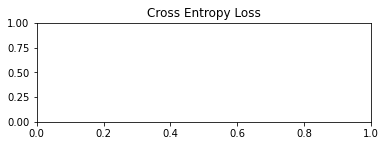

In [23]:
summarize_diagnostics(classifier)